In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [72]:
data = pd.read_excel("C:\\Users\\ELITEBOOK\\Downloads\\online+retail\\Online Retail.xlsx")

In [73]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [74]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

**Cleaning the Dataset**

*Changing the variables to the right Data types*

In [75]:
data['InvoiceNo'] = data['InvoiceNo'].astype(str)
data['StockCode'] = data['StockCode'].astype(str)
data['Description'] = data['Description'].astype(str)
data['Quantity'] = data['Quantity'].astype(int)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['UnitPrice'] = data['UnitPrice'].astype(float)
data['CustomerID'] = data['CustomerID'].astype(str)
data['Country'] = data['Country'].astype(str)

In [76]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int32
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

*Check for missing values and data types*

In [77]:
print("\nData types and missing values:")
print(data.info())
data.isnull().sum()


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int32         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 31.0+ MB
None


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Descriptive statistics**

In [78]:
descriptive_stats = data[['Quantity', 'UnitPrice']].describe()
print("\nDescriptive statistics for Quantity and UnitPrice:")
print(descriptive_stats)


Descriptive statistics for Quantity and UnitPrice:
            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


*Histogram for Quantity and Unit Price*

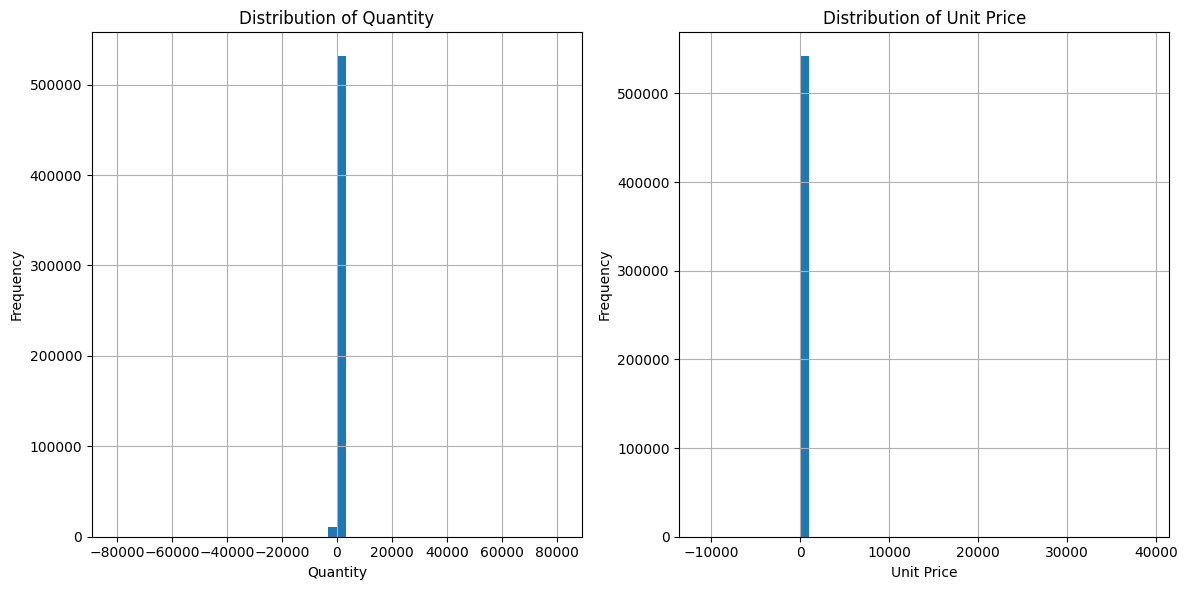

In [79]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data['Quantity'].hist(bins=50)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
data['UnitPrice'].hist(bins=50)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Check for Outliers**

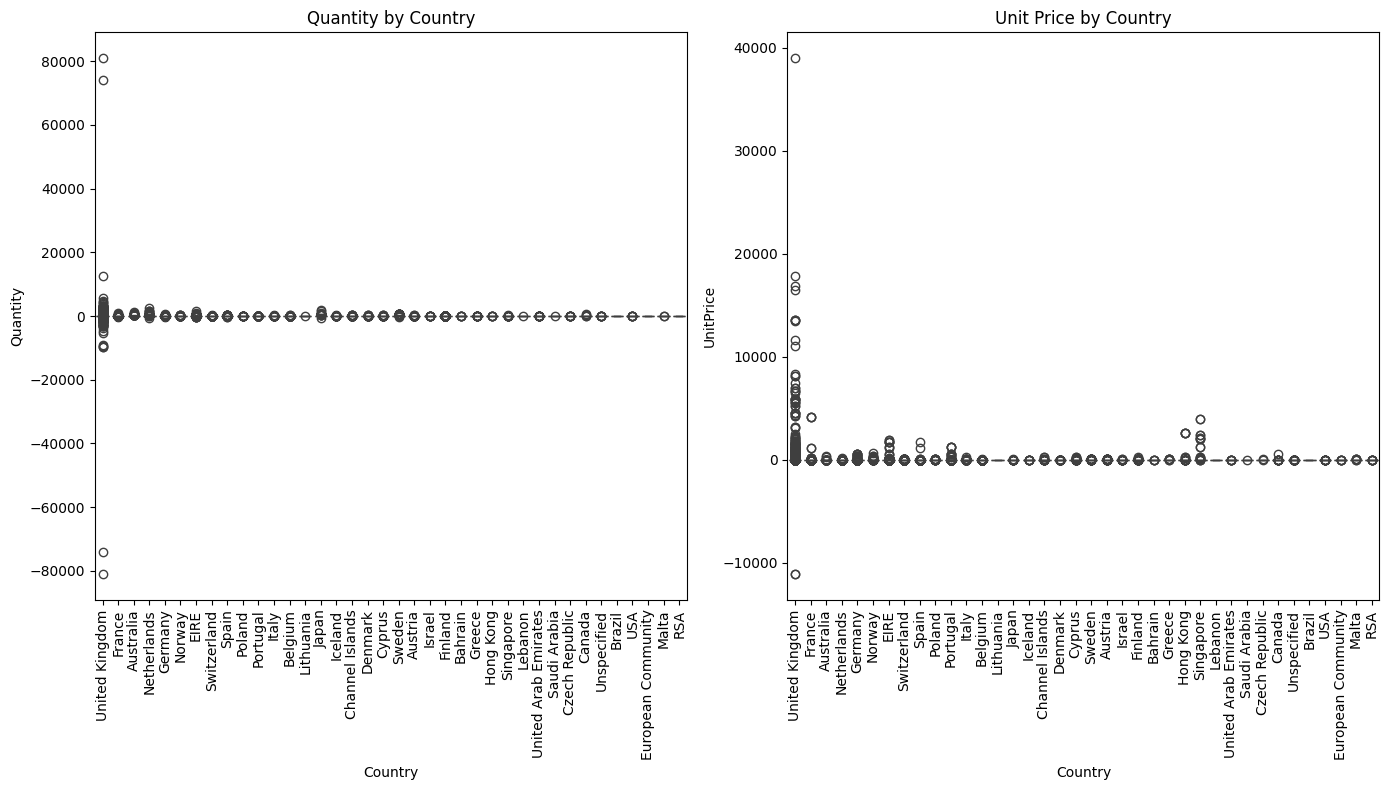

In [80]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='Country', y='Quantity', data=data)
plt.title('Quantity by Country')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(x='Country', y='UnitPrice', data=data)
plt.title('Unit Price by Country')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Getting rid of Outliers and replacing them with the mean calculated excluding the outliers**

In [81]:
data['Quantity'] = data['Quantity'].apply(lambda x: max(x, 0))

def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    non_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    mean_value = non_outliers[column].mean()
    
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), mean_value, df[column])
    
    return df

data = replace_outliers_with_mean(data, 'Quantity')
data = replace_outliers_with_mean(data, 'UnitPrice')

print("\nDescriptive statistics after removing outliers:")
print(data[['Quantity', 'UnitPrice']].describe())


Descriptive statistics after removing outliers:
            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        4.612419       2.522504
std         4.208572       1.846213
min         0.000000       0.000000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%         6.000000       3.290000
max        23.000000       8.330000


In [82]:
import pandas as pd
from docx import Document

# Assuming you have already loaded your data into a DataFrame called 'data'
summary_stats = data[['Quantity', 'UnitPrice']].describe()

# Create a new Word document
doc = Document()

# Add a table with gridlines
table = doc.add_table(rows=summary_stats.shape[0] + 1, cols=summary_stats.shape[1])
table.style = 'Table Grid'

# Add column headers
for col_idx, col_name in enumerate(summary_stats.columns):
    table.cell(0, col_idx).text = col_name

# Add summary statistics (mean, count, etc.)
for row_idx, (_, row) in enumerate(summary_stats.iterrows(), start=1):
    for col_idx, value in enumerate(row):
        table.cell(row_idx, col_idx).text = f"{value:.2f}" if isinstance(value, float) else str(value)

# Save the document
doc.save(r'C:\Users\ELITEBOOK\Desktop\Eriton\summary_stats.docx')


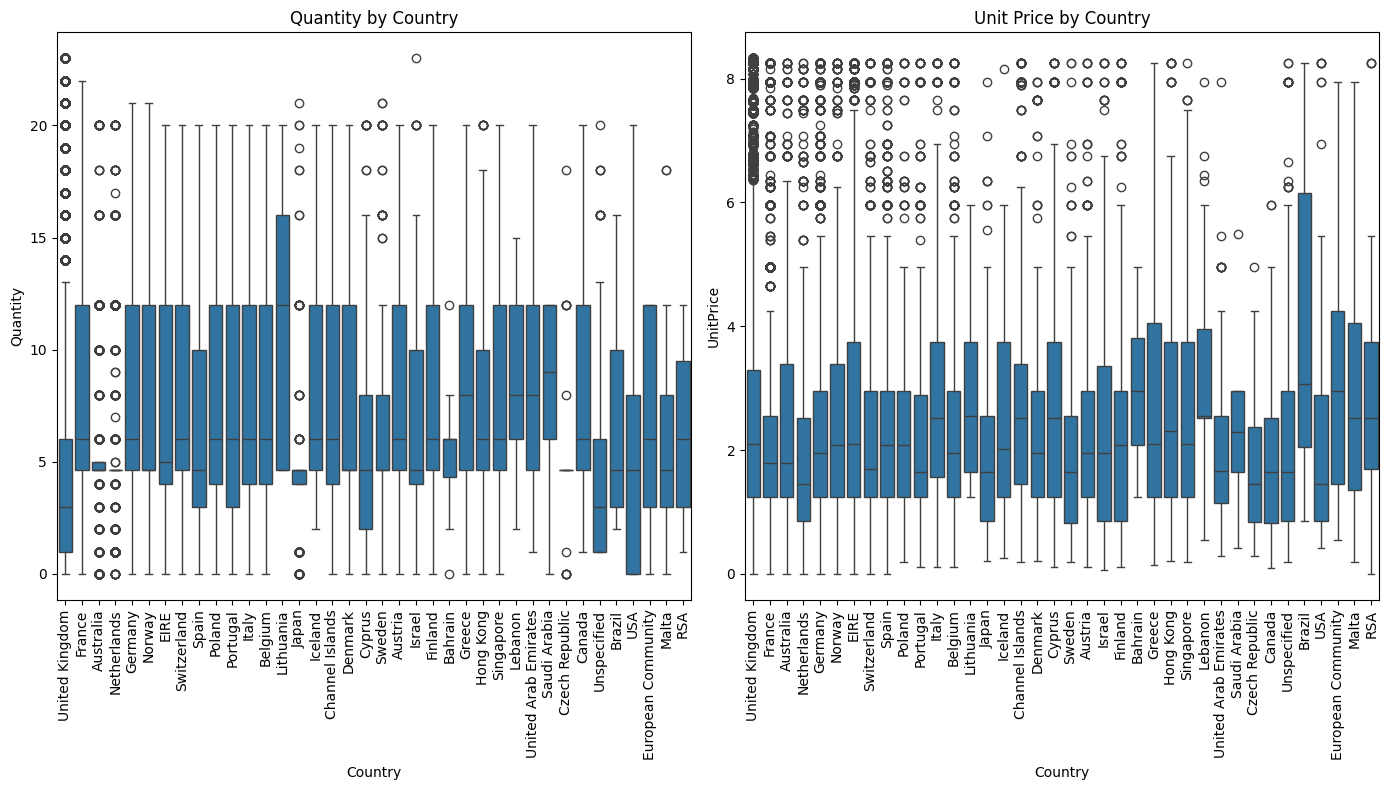

In [83]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='Country', y='Quantity', data=data)
plt.title('Quantity by Country')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(x='Country', y='UnitPrice', data=data)
plt.title('Unit Price by Country')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Number of Cancelled orders per country**

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_11780\1273448504.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CancelledOrders', y='Country', data=cancelled_counts, palette='viridis')


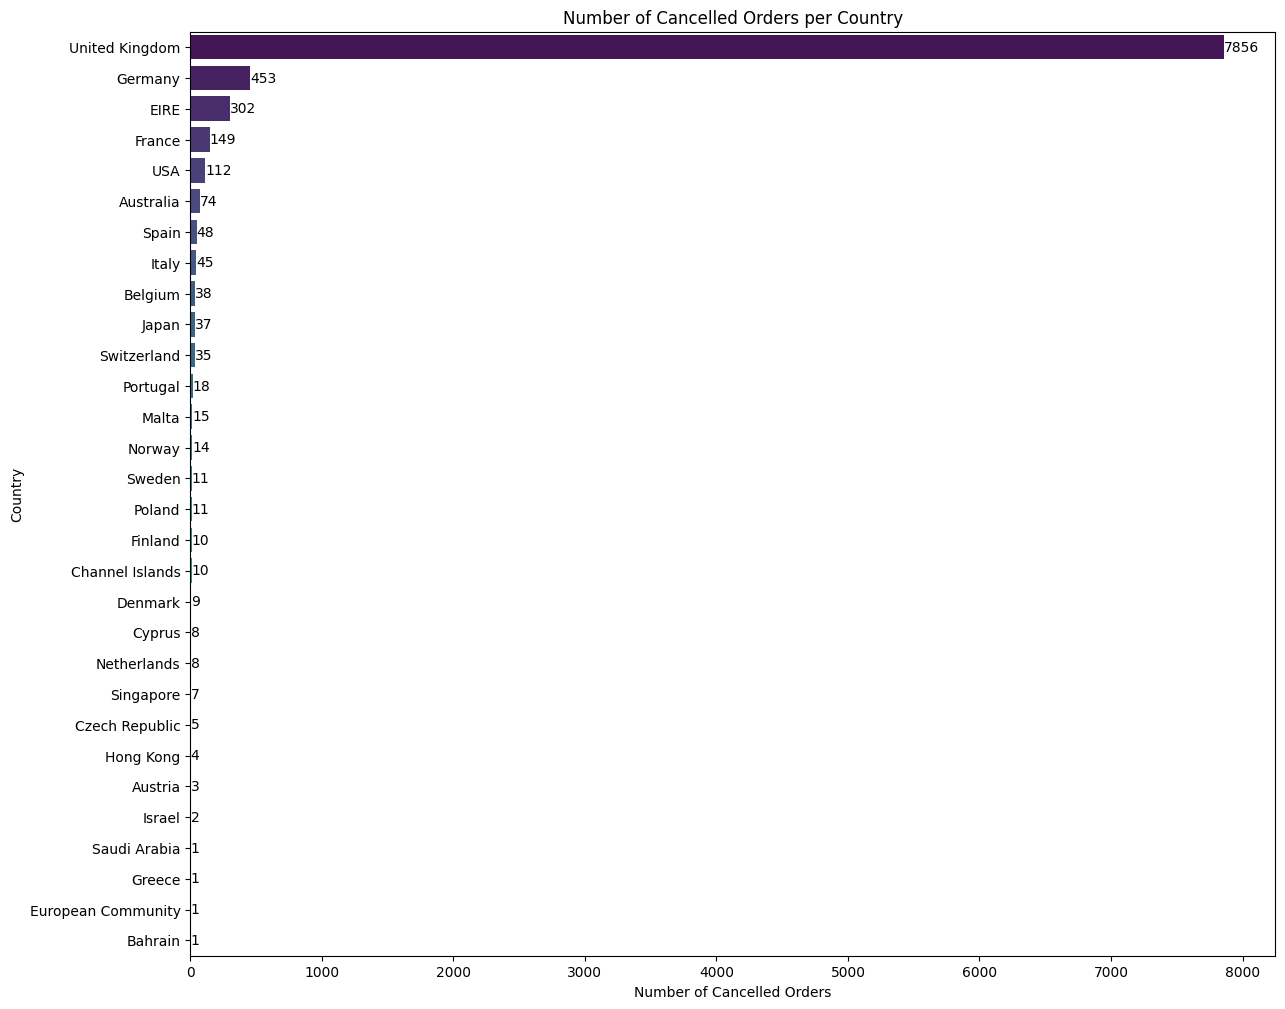

In [84]:
cancelled_orders = data[data['InvoiceNo'].str.startswith('C')]

cancelled_counts = cancelled_orders.groupby('Country').size().reset_index(name='CancelledOrders')

cancelled_counts = cancelled_counts.sort_values(by='CancelledOrders', ascending=False)

plt.figure(figsize=(14, 12))
sns.barplot(x='CancelledOrders', y='Country', data=cancelled_counts, palette='viridis')

for index, value in enumerate(cancelled_counts['CancelledOrders']):
    plt.text(value, index, str(value), color='black', ha="left", va="center")

plt.title('Number of Cancelled Orders per Country')
plt.xlabel('Number of Cancelled Orders')
plt.ylabel('Country')
plt.show()

**Removing Cancelled orders**

In [85]:
data = data[~data['InvoiceNo'].str.startswith('C')]

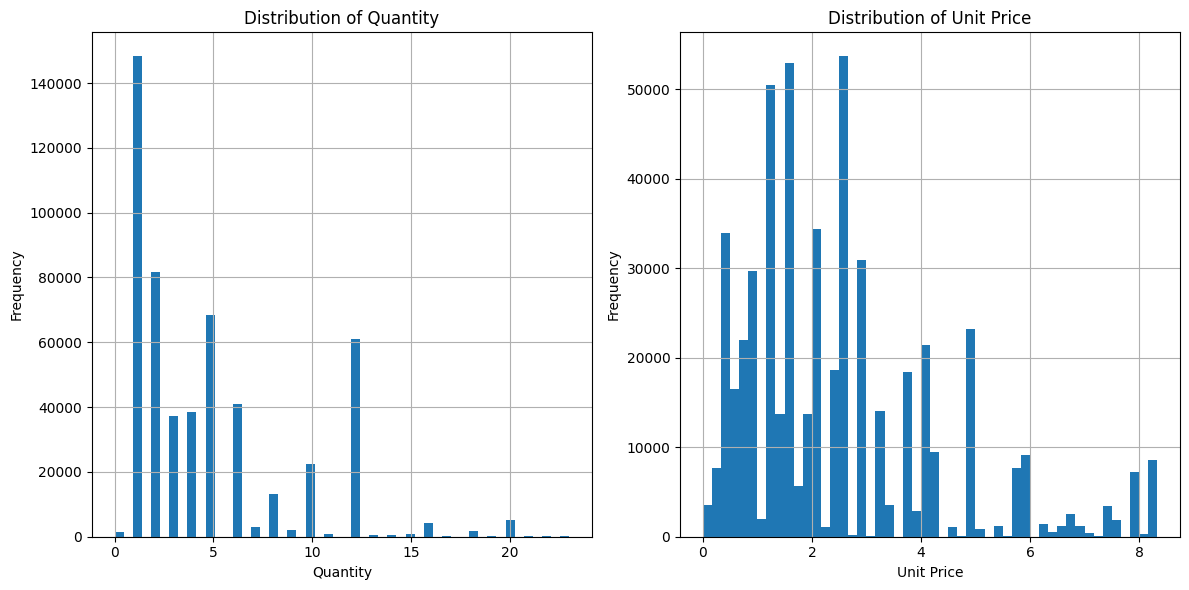

In [86]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data['Quantity'].hist(bins=50)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
data['UnitPrice'].hist(bins=50)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [87]:
data['TotalSales'] = data['UnitPrice'] * data['Quantity']

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_11780\3567207955.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSales', y='Country', data=total_sales_by_country, palette='viridis')


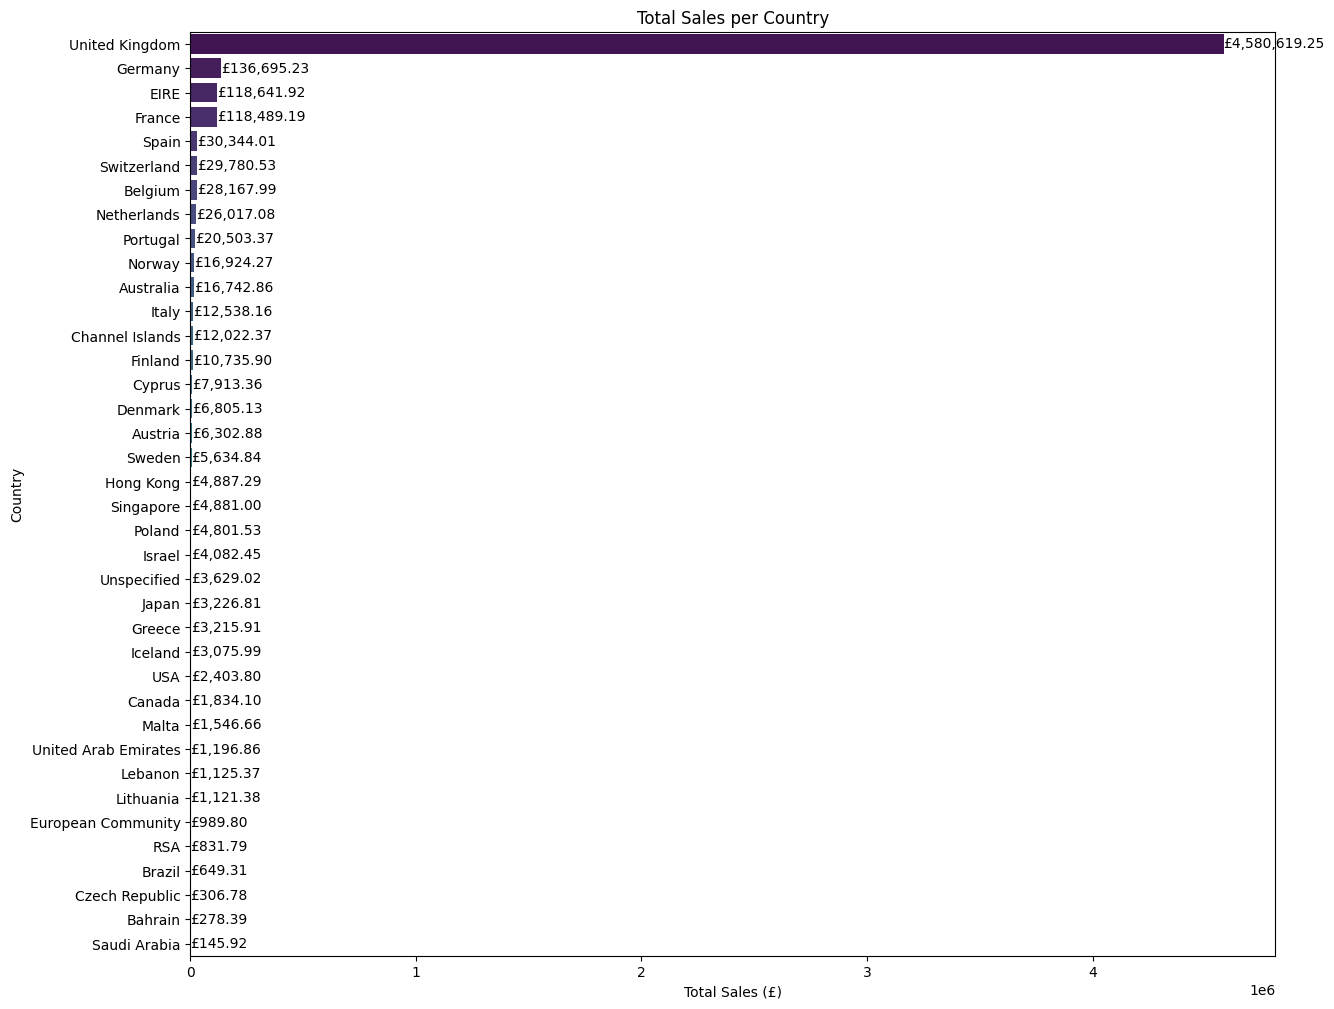

In [94]:

total_sales_by_country = data.groupby('Country')['TotalSales'].sum().reset_index()

total_sales_by_country = total_sales_by_country.sort_values(by='TotalSales', ascending=False)

plt.figure(figsize=(14, 12))
sns.barplot(x='TotalSales', y='Country', data=total_sales_by_country, palette='viridis')

for index, value in enumerate(total_sales_by_country['TotalSales']):
    plt.text(value, index, f'£{value:,.2f}', color='black', ha="left", va="center")

plt.title('Total Sales per Country')
plt.xlabel('Total Sales (£)')
plt.ylabel('Country')
plt.show()

**INFERENTIAL STATISTICS**

**Hypothesis 1: Seasonal Effect on Total Sales**

***Null Hypothesis (H0)***: There is no difference in the total sales between peak (holiday) season and off-peak season.

***Alternative Hypothesis (H1)***: There is a significant difference in the total sales between peak (holiday) season and off-peak season.

In [89]:

data['Month'] = data['InvoiceDate'].dt.month

peak_season = data[data['Month'].isin([9, 10, 11, 12])]
off_peak_season = data[data['Month'].isin([1, 2,3,4,5])]

peak_sales = peak_season.groupby('Month')['TotalSales'].sum().reset_index()
off_peak_sales = off_peak_season.groupby('Month')['TotalSales'].sum().reset_index()


t_stat, p_value = stats.ttest_ind(peak_season['TotalSales'], off_peak_season['TotalSales'], equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in total sales between peak season and off-peak season.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in total sales between peak season and off-peak season.")

T-Statistic: -3.6585571792419858
P-Value: 0.00025367586915612774
Reject the null hypothesis: There is a significant difference in total sales between peak season and off-peak season.


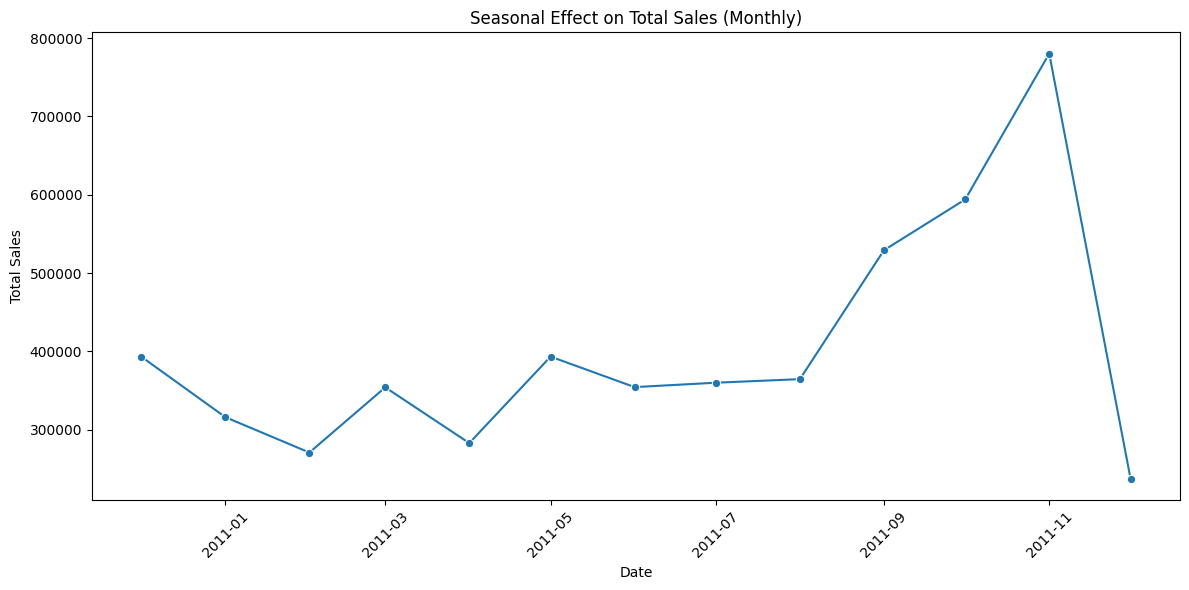

In [90]:
data['Year'] = data['InvoiceDate'].dt.year

monthly_sales = data.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()

monthly_sales['Year-Month'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(Day=1))

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='TotalSales', marker='o')
plt.title('Seasonal Effect on Total Sales (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Hypothesis 2: Customer Purchase Frequency and Total Spending**

**Null Hypothesis (H0)**: There is no correlation between the frequency of purchases made by customers and their total spending.

**Alternative Hypothesis (H1)**: There is a significant correlation between the frequency of purchases made by customers and their total spending.

In [91]:
customer_data = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'TotalSales': 'sum'
}).reset_index()

customer_data.columns = ['CustomerID', 'PurchaseFrequency', 'TotalSpending']

correlation, p_value = stats.pearsonr(customer_data['PurchaseFrequency'], customer_data['TotalSpending'])

print(f"Pearson Correlation: {correlation}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between the frequency of purchases made by customers and their total spending.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between the frequency of purchases made by customers and their total spending.")


Pearson Correlation: 0.9950712050950317
P-Value: 0.0
Reject the null hypothesis: There is a significant correlation between the frequency of purchases made by customers and their total spending.


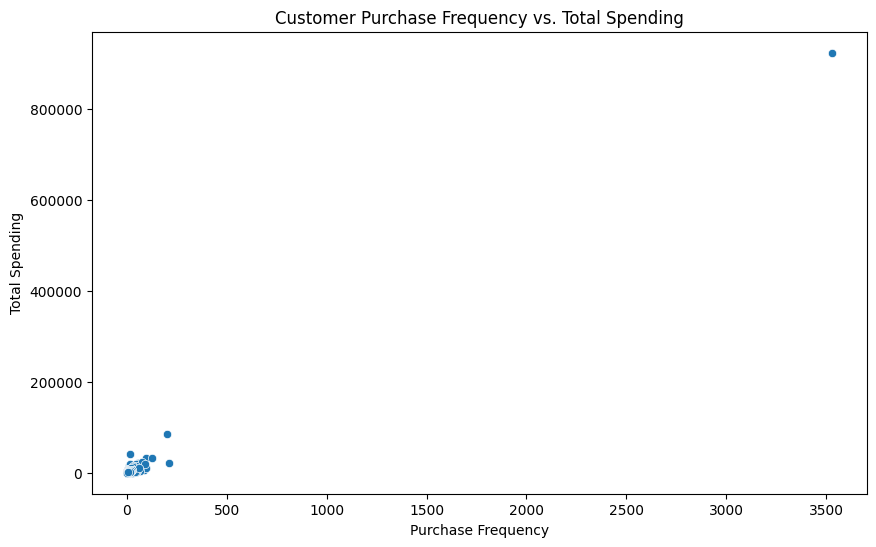

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PurchaseFrequency', y='TotalSpending', data=customer_data)
plt.title('Customer Purchase Frequency vs. Total Spending')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spending')
plt.show()

**INFERENTIAL STATISTICS**

In [93]:

sample_mean = data['UnitPrice'].mean()

t_statistic, p_value = stats.ttest_1samp(data['UnitPrice'], sample_mean)

print(f"Sample Mean: {sample_mean}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean unit price of items is significantly different from the hypothesized population mean.")
else:
    print("Fail to reject the null hypothesis: The mean unit price of items is not significantly different from the hypothesized population mean.")

Sample Mean: 2.519249259497506
T-Statistic: 0.0
P-Value: 1.0
Fail to reject the null hypothesis: The mean unit price of items is not significantly different from the hypothesized population mean.
